# 3.12 处理时间序列

## 3.12.1 Python的日期与时间工具

1. 原生Python的日期与时间工具：datetime与dateutil

In [1]:
from datetime import datetime

In [2]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
from dateutil import parser

In [4]:
date = parser.parse("4th of July, 2015")

In [5]:
date

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
date.strftime('%A')

'Saturday'

2. 时间类型数组：Numpy的datetime64类型

In [7]:
import numpy as np

In [8]:
date = np.array('2015-07-04', dtype=np.datetime64)

In [9]:
date

array('2015-07-04', dtype='datetime64[D]')

In [10]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [11]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [12]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [13]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

3. Pandas的日期与时间工具：理想与现实的最佳解决方案

In [14]:
import pandas as pd

In [15]:
date = pd.to_datetime("4th of July, 2015")

In [16]:
date

Timestamp('2015-07-04 00:00:00')

In [17]:
date.strftime('%A')

'Saturday'

In [18]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [19]:
date + pd.to_timedelta(np.arange(12))

DatetimeIndex([          '2015-07-04 00:00:00',
               '2015-07-04 00:00:00.000000001',
               '2015-07-04 00:00:00.000000002',
               '2015-07-04 00:00:00.000000003',
               '2015-07-04 00:00:00.000000004',
               '2015-07-04 00:00:00.000000005',
               '2015-07-04 00:00:00.000000006',
               '2015-07-04 00:00:00.000000007',
               '2015-07-04 00:00:00.000000008',
               '2015-07-04 00:00:00.000000009',
               '2015-07-04 00:00:00.000000010',
               '2015-07-04 00:00:00.000000011'],
              dtype='datetime64[ns]', freq=None)

## 3.12.2 Pandas时间序列：用时间作索引

In [20]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])

In [21]:
data = pd.Series([0, 1, 2, 3], index=index)

In [22]:
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [23]:
data['2014-07-04': '2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [24]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## 3.12.3 Pandas时间序列数据结构

In [25]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])

In [26]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [27]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [28]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

创建一个有规律的日期序列

In [29]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

日期范围可以是开始时间和周期数periods

In [30]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

通过freq参数改变时间间隔，默认值是D，这里改成H（小时）。

In [31]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

创建一个有规律的周期或时间间隔序列

In [32]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [33]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## 3.12.4 时间频率与偏移量

可以将频率组合起来创建新的周期

In [34]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [35]:
from pandas.tseries.offsets import BDay

In [36]:
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## 3.12.5 重新取样、迁移和窗口

In [10]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
yf.pdr_override()

apple=web.DataReader('GOOG',data_source='yahoo',start='2004-01-01',end='2016-12-01')

In [11]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


出于简化的目的，这里只用收盘价

In [12]:
goog = apple['Close']

In [13]:
goog.head()

Date
2004-08-19    49.845802
2004-08-20    53.805050
2004-08-23    54.346527
2004-08-24    52.096165
2004-08-25    52.657513
Name: Close, dtype: float64

In [20]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

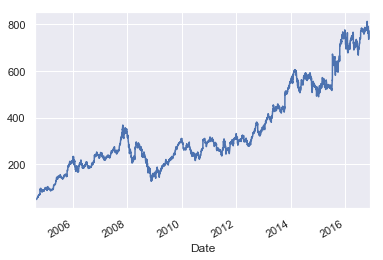

In [22]:
goog.plot()

1. 重新取样与频率转换

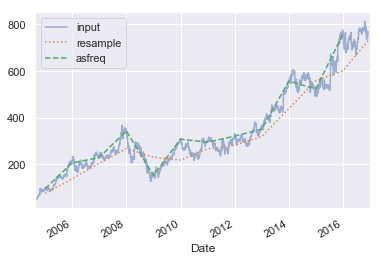

In [25]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')